Grade=87/100

# Lab 6: Solar Spectrum 

## Marah Brinjikji

## Abstract and Introduction

The spectrum of an object is the flux of the light per unit wavelength. Measurements of the wavelengths of lines from stars identify the elements and radial velocities of stars, and emission vs. absorption lines yield the relative temperature and density of the source regions. For galaxies, we measure the integrated stellar emission and absorption. 

First, we pointed our telescope at the sky and captured the scattered sunlight off the atmosphere in order to create our own Sun spectrum. We also took a spectrum of a CFL lamp to help with the calibrations. Because, in order to get valuable information from the raw spectral data taken of these cosmic objects, the spectra must be calibrated so we know which wavelengths we're looking at. 
Once we had our raw data, we flattened it and reduced it to a 1-dimensional plot, which is what spectra are. Then we used the CFL spectrum and published data about CFL spectral lines in order to calibrate our data to the known data. We then transferred the CFL calibration the solar spectrum and identified a few of the present emission lines. 

In [2]:
'''Import necessary packages and libraries'''
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import ndimage
import sys
from scipy.optimize import curve_fit
from IPython.display import Image

In [6]:
root = '/Users/mbrinji/Desktop/lab6/'
spectra = []
for i in range(1,6):
    spectra.append(np.float64(fits.getdata(root + 'Spectra' + str(i) + '.fit')))
CFL = np.float64(fits.getdata(root + 'CFL.fit'))

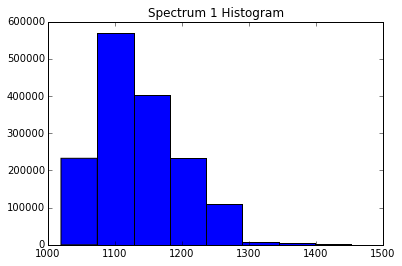

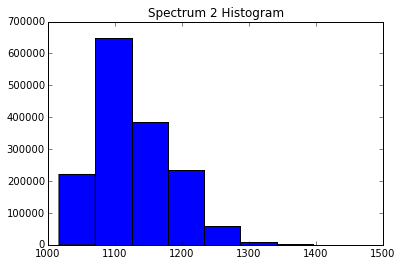

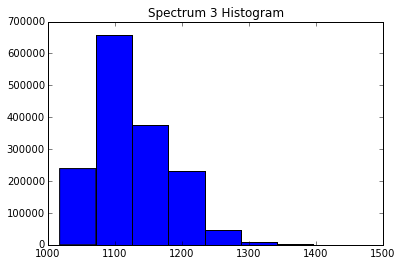

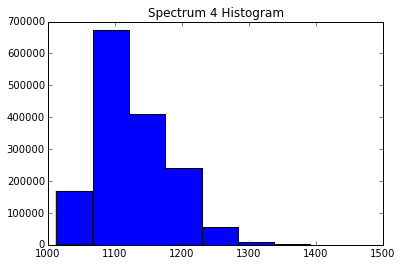

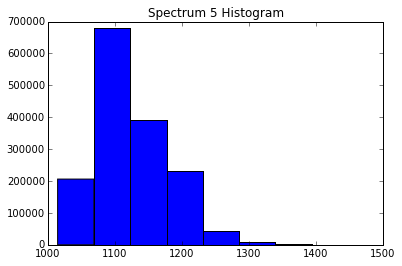

In [7]:
plt.figure(1)
plt.hist(spectra[0].flatten(),bins=1000)
plt.title('Spectrum 1 Histogram')
plt.xlim(1000,1500)
plt.figure(2)
plt.hist(spectra[1].flatten(),bins = 1000)
plt.title('Spectrum 2 Histogram')
plt.xlim(1000,1500)
plt.figure(3)
plt.title('Spectrum 3 Histogram')
plt.hist(spectra[2].flatten(), bins = 1000)
plt.xlim(1000,1500)
plt.figure(4)
plt.title('Spectrum 4 Histogram')
plt.xlim(1000,1500)
plt.hist(spectra[3].flatten(), bins = 1000)
plt.figure(5)
plt.title('Spectrum 5 Histogram')
plt.xlim(1000,1500)
plt.hist(spectra[4].flatten(), bins=1000)
plt.show()

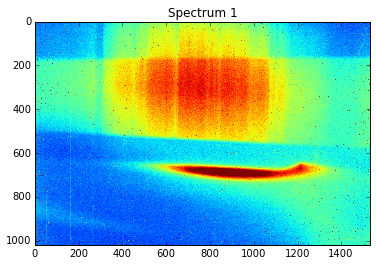

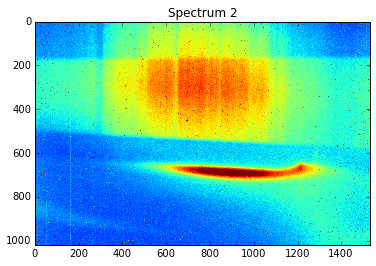

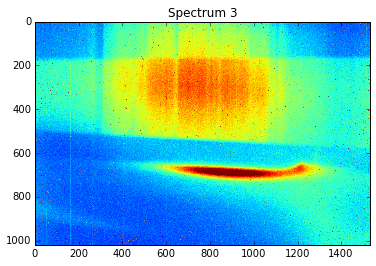

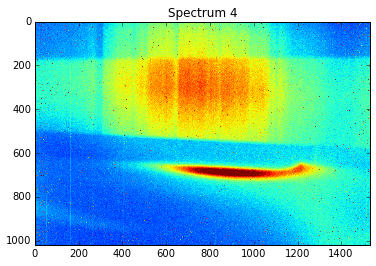

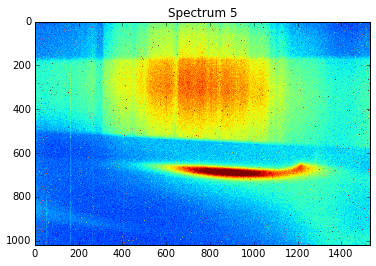

In [8]:
plt.figure(1)
plt.imshow(spectra[0],vmin=1000, vmax=1300)
plt.title('Spectrum 1')
plt.figure(2)
plt.imshow(spectra[1],vmin=1000, vmax=1300)
plt.title('Spectrum 2')
plt.figure(3)
plt.imshow(spectra[2],vmin=1000, vmax=1300)
plt.title('Spectrum 3')
plt.figure(4)
plt.imshow(spectra[3],vmin=1000, vmax=1300)
plt.title('Spectrum 4')
plt.figure(5)
plt.imshow(spectra[4],vmin=1000, vmax=1300)
plt.title('Spectrum 5')
plt.show()

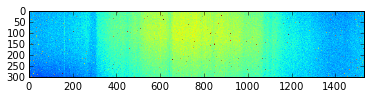

In [9]:
subspectra = spectra[4][200:500,:]
plt.imshow(subspectra, vmin=1000, vmax=1400)
avgspectra = (spectra[1] + spectra[2] + spectra[3] + spectra[4]) / 4
plt.show()

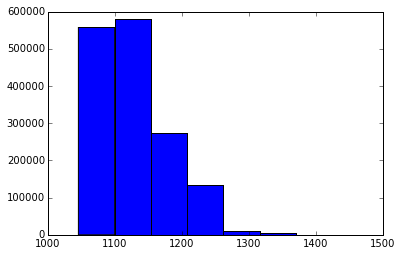

In [10]:
plt.hist(avgspectra.flatten(),bins = 1000)
plt.xlim(1000,1500)
plt.show()

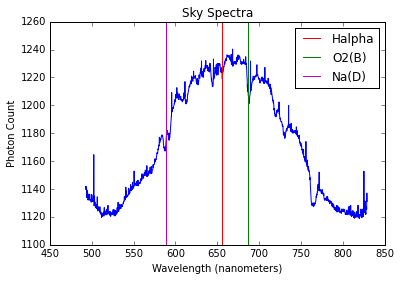

In [11]:
skyspectra = np.zeros(1530)
for i in range(200,501):
    skyspectra1 = avgspectra[i,:]
    skyspectra = skyspectra + skyspectra1
skyspectra = skyspectra/300
skyspectra[161] = skyspectra[160]
skyspectra[218] = skyspectra[219]
skyspectra[402] = skyspectra[401]
skyspectra[415] = skyspectra[414]
skyspectra[599] = skyspectra[598]
skyspectra[588] = skyspectra[587]
skyspectra[1476] = skyspectra[1477]
skyspectra[645] = skyspectra[644]
skyspectra[1503] = skyspectra[1502]
vec = np.arange(1530)
vec = (vec*-.22) + 829
plt.plot(vec, skyspectra)
plt.xlabel('Wavelength (nanometers)')
plt.ylabel('Photon Count')
plt.title('Sky Spectra')
plt.axvline(656.281,color = 'r', label='Halpha')
plt.axvline(686.719,color = 'g', label = 'O2(B)')
plt.axvline(589.3,color = 'm', label = 'Na(D)')
plt.legend()
plt.show()

(1020, 1530)


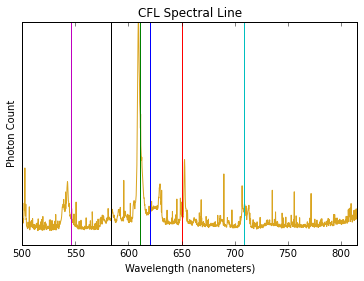

In [12]:
CFL_line = np.zeros(1530)
print np.shape(CFL)
for i in range(200,501):
    CFL1 = CFL[i,:]
    CFL_line = CFL_line + CFL1
CFL_line = CFL_line/300
CFL_line[161] = CFL_line[160]
CFL_line[218] = CFL_line[219]
CFL_line[402] = CFL_line[401]
CFL_line[415] = CFL_line[414]
CFL_line[599] = CFL_line[598]
CFL_line[588] = CFL_line[587]
CFL_line[1476] = CFL_line[1477]
CFL_line[645] = CFL_line[644]
CFL_line[1503] = CFL_line[1502]
xvec = np.arange(1530)
xvec = (xvec*-.22) + 829
plt.semilogy(xvec,CFL_line, color = 'goldenrod')
plt.axvline(650.4,color = 'r')
plt.axvline(610.8,color = 'g')
plt.axvline(546,color = 'm')
plt.axvline(620.6,color = 'b')
plt.axvline(583.6,color = 'k')
plt.axvline(709,color = 'c')
plt.title('CFL Spectral Line')
plt.xlabel('Wavelength (nanometers)')
plt.ylabel('Photon Count')
plt.ylim(1050,1250)
plt.xlim(500,815)
plt.show()
#plt.plot(np.arange(1530),CFL_line)
#plt.xlim(500,600)

# Conclusion

In conclusion, this lab taught me how to reduce, analyze, and understand spectral data. This will be valuable in my continuing career as an astrophysicist.